# Regresión Lineal con Gradiente Descendente

In [1]:
# Se importan las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
# Lectura de archivos
data=pd.read_csv("../Data/ex1data1.txt",names=["population","profit"])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
# Variable independiente
x_df=pd.DataFrame(data.population)
# Variable dependiente
y_df=pd.DataFrame(data.profit)
# Longitud de y
m=len(y_df)

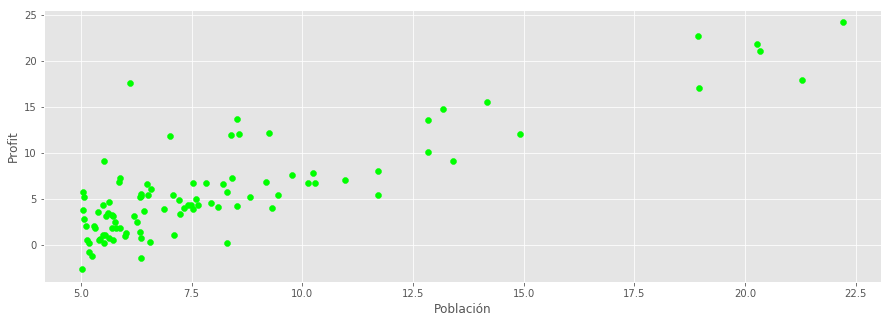

In [4]:
# Visualización
plt.figure(figsize=(15,5))
plt.scatter(x_df,y_df,c="lime")
plt.xlabel("Población")
plt.ylabel("Profit")
plt.show()

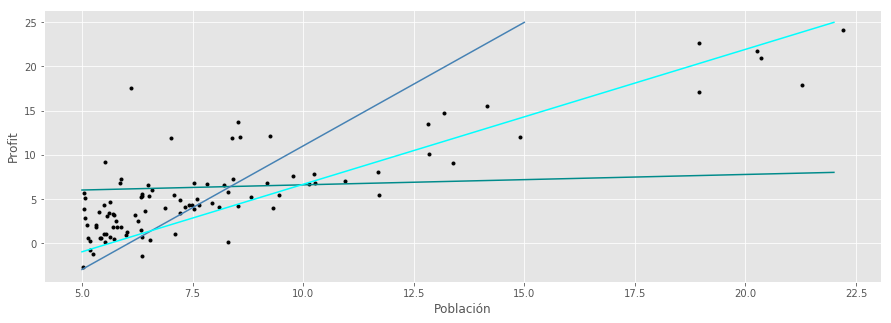

In [5]:
# Visualización
plt.figure(figsize=(15,5))
plt.plot(x_df,y_df,"k.")
# Ajuste de distintas rectas de forma arbitraria
plt.plot([5,22],[6,8],"-",c="darkcyan")
plt.plot([5,15],[-3,25],"-",c="steelblue")
plt.plot([5,22],[-1,25],"-",c="aqua")
plt.xlabel("Población")
plt.ylabel("Profit")
plt.show()

In [6]:
# Número de iteraciones
iterations=1500
# Tasa de aprendizaje
alpha=0.01
# Se agregan 1's para la intersección
x_df["intercept"]=1
# La variable dependiente e independiente se convierten a arrays
x=np.array(x_df)
y=np.array(y_df).flatten()
# Se inicializan los coeficientes
beta=np.array([0,0])

In [7]:
# Función de coste
def cost_function(x,y,beta):
    # Número de datos a entrenar
    m=len(y)
    # Calcular la función de costo
    J=np.sum((x.dot(beta)-y)**2)/(2*m)
    return J

In [8]:
# Descenso del gradiente
def gradient_descent(x,y,beta,alpha,iterations):
    # Variable que guarda el historial de la función de coste por cada iteración
    cost_history=[0]*iterations
    # Descenso del gradiente 
    for iteration in range(iterations):
        yhat=x.dot(beta)
        loss=yhat-y
        gradient=x.T.dot(loss)/m
        beta=beta-alpha*gradient
        cost=cost_function(x,y,beta)
        cost_history[iteration]=cost    
    return beta,cost_history

In [9]:
(beta,cost)=gradient_descent(x,y,beta,alpha,iterations)
print(beta)

[ 1.16636235 -3.63029144]


In [10]:
# Imprimir el modelo que mejor ajusta a los datos
best_fit_x=np.linspace(0,25,20)
best_fit_y=[beta[1]+beta[0]*xx for xx in best_fit_x]

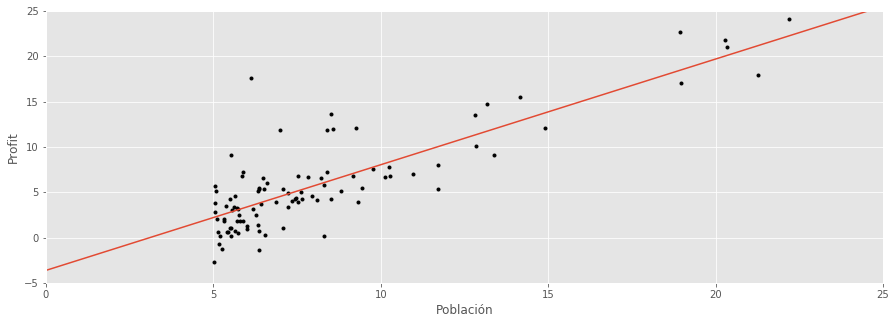

In [11]:
# Visualización
plt.figure(figsize=(15,5))
plt.plot(x_df.population,y_df,"k.")
plt.plot(best_fit_x,best_fit_y,"-")
plt.axis([0,25,-5,25])
plt.xlabel("Población")
plt.ylabel("Profit")
plt.show()

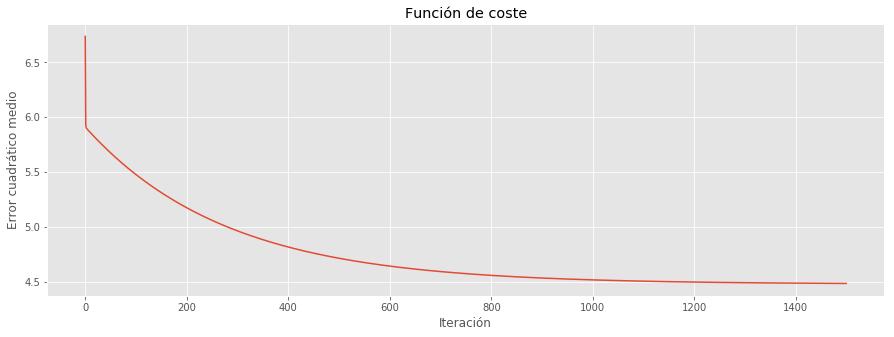

In [12]:
# Visualización de la función de coste por cada iteración
plt.figure(figsize=(15,5))
plt.plot(cost)
plt.xlabel("Iteración")
plt.ylabel("Error cuadrático medio")
plt.title("Función de coste")
plt.show()

El descenso del gradiente converge a un valor.

In [13]:
# Predicción con 28 en población
np.array([28,1]).dot(beta)

29.027854369991935